# **Import Libraries**

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

# **Load Dataset**

In [71]:
df = pd.read_csv("laptop_battery_life.csv")

In [72]:
df.head()

,CPU_Usage(%),Brightness(%),Background_Apps,Battery_Health(%),Temperature(°C),Battery_Life(min)
0,56,67,1,68,31,403
1,97,10,5,99,39,482
2,19,78,9,76,39,468
3,76,13,17,60,16,369
4,65,25,9,84,17,512


In [73]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [74]:
x

,CPU_Usage(%),Brightness(%),Background_Apps,Battery_Health(%),Temperature(°C)
0,56,67,1,68,31
1,97,10,5,99,39
2,19,78,9,76,39
3,76,13,17,60,16
4,65,25,9,84,17
...,...,...,...,...,...
495,38,11,9,84,16
496,56,22,26,79,16
497,99,49,2,61,17
498,14,11,21,98,32


In [75]:
y

,Battery_Life(min)
0,403
1,482
2,468
3,369
4,512
...,...
495,623
496,442
497,305
498,659


# **Exploratory Data Analysis (EDA)**

In [76]:
Battery_Healths = np.array(df['Battery_Health(%)'])
CPU_Usages = np.array(df['CPU_Usage(%)'])
Brightness = np.array(df['Brightness(%)'])

In [77]:
for i in range(0,len(df)):
  if Battery_Healths[i] > 100 or CPU_Usages[i] > 100 or Brightness[i] > 100:
    print("At",i)
else:
  print("No unusual values")

No unusual values


In [78]:
print(df.isnull().sum())

CPU_Usage(%)         0
Brightness(%)        0
Background_Apps      0
Battery_Health(%)    0
Temperature(°C)      0
Battery_Life(min)    0
dtype: int64


In [79]:
print(df.describe())

       CPU_Usage(%)  Brightness(%)  Background_Apps  Battery_Health(%)  \
count    500.000000     500.000000        500.00000         500.000000   
mean      51.280000      52.802000         14.82200          80.092000   
std       27.863567      26.598153          8.56651          11.346763   
min        5.000000      10.000000          1.00000          60.000000   
25%       27.000000      29.000000          7.00000          71.000000   
50%       52.000000      53.000000         15.00000          80.000000   
75%       73.000000      75.000000         22.00000          90.000000   
max       99.000000      99.000000         29.00000          99.000000   

       Temperature(°C)  Battery_Life(min)  
count       500.000000          500.00000  
mean         26.656000          433.50200  
std           7.258584          117.14627  
min          15.000000           54.00000  
25%          20.000000          352.50000  
50%          26.000000          431.00000  
75%          33.000000   

In [80]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x790741e1bc90>,
 'caps': [<matplotlib.lines.Line2D at 0x790741d95250>,
 'boxes': [<matplotlib.lines.Line2D at 0x790741e1b290>,
 'medians': [<matplotlib.lines.Line2D at 0x790741d96790>,
 'fliers': [<matplotlib.lines.Line2D at 0x790741d97110>,
 'means': []}

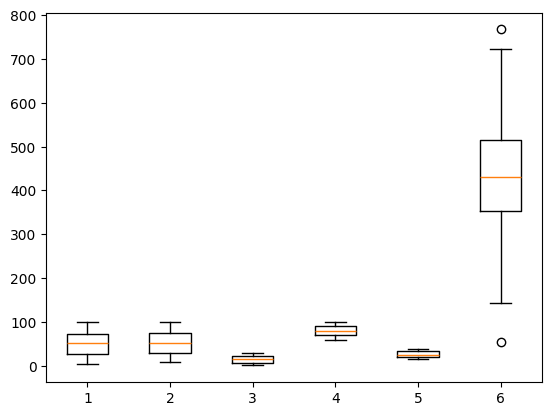

In [81]:
plt.boxplot(df)

(array([59., 47., 51., 49., 38., 55., 64., 43., 26., 68.]),
 array([ 5. , 14.4, 23.8, 33.2, 42.6, 52. , 61.4, 70.8, 80.2, 89.6, 99. ]),
 <BarContainer object of 10 artists>)

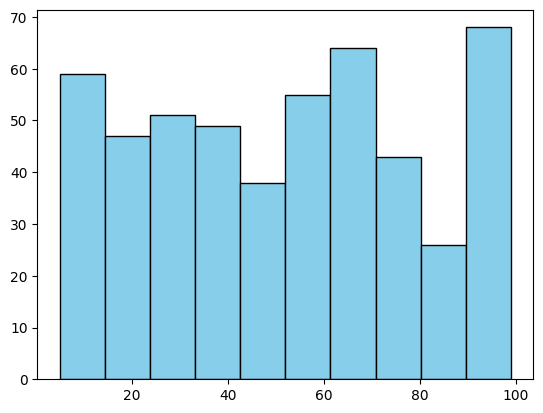

In [82]:
plt.hist(df['CPU_Usage(%)'],color='skyblue',edgecolor = 'black')

(array([61., 55., 53., 48., 44., 48., 51., 41., 49., 50.]),
 array([10. , 18.9, 27.8, 36.7, 45.6, 54.5, 63.4, 72.3, 81.2, 90.1, 99. ]),
 <BarContainer object of 10 artists>)

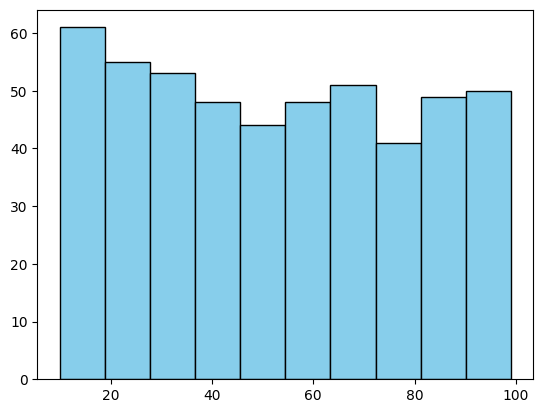

In [83]:
plt.hist(df['Brightness(%)'],color='skyblue',edgecolor = 'black')

(array([57., 54., 57., 47., 30., 42., 51., 64., 48., 50.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

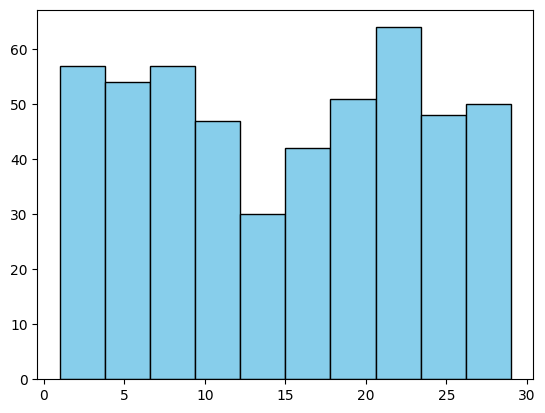

In [84]:
plt.hist(df['Background_Apps'],color='skyblue',edgecolor = 'black')

(array([41., 48., 48., 57., 54., 41., 46., 60., 53., 52.]),
 array([60. , 63.9, 67.8, 71.7, 75.6, 79.5, 83.4, 87.3, 91.2, 95.1, 99. ]),
 <BarContainer object of 10 artists>)

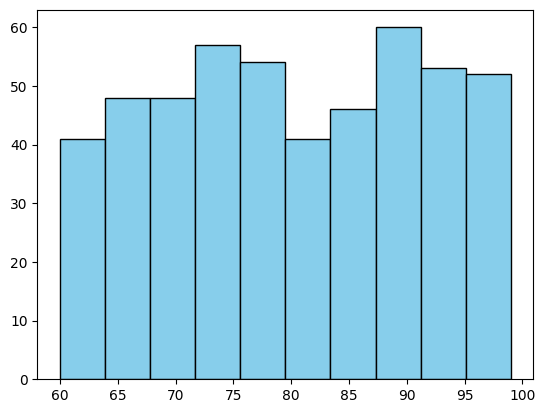

In [85]:
plt.hist(df['Battery_Health(%)'],color = 'skyblue',edgecolor = 'black')

(array([67., 43., 57., 41., 44., 62., 37., 50., 40., 59.]),
 array([15. , 17.4, 19.8, 22.2, 24.6, 27. , 29.4, 31.8, 34.2, 36.6, 39. ]),
 <BarContainer object of 10 artists>)

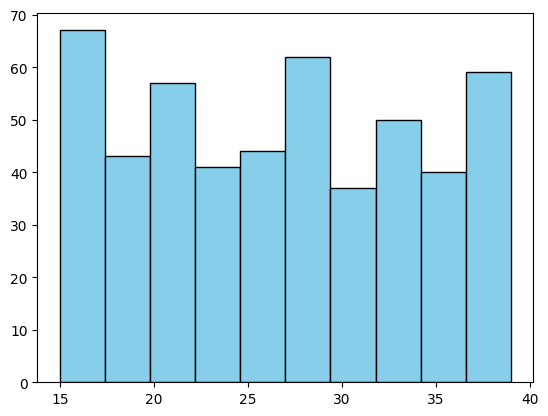

In [86]:
plt.hist(df['Temperature(°C)'],color ='skyblue',edgecolor= 'black')

# **Model Training**

In [46]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# **Model Evalution**

In [50]:
y_pred = regressor.predict(X_test)

In [92]:
y_pred

array([[466.],
       [419.],
       [550.],
       [317.],
       [318.],
       [613.],
       [540.],
       [411.],
       [484.],
       [408.],
       [158.],
       [351.],
       [170.],
       [429.],
       [500.],
       [445.],
       [623.],
       [369.],
       [372.],
       [370.],
       [594.],
       [253.],
       [330.],
       [314.],
       [357.],
       [419.],
       [305.],
       [359.],
       [557.],
       [340.],
       [458.],
       [427.],
       [353.],
       [253.],
       [468.],
       [568.],
       [507.],
       [576.],
       [645.],
       [569.],
       [511.],
       [356.],
       [262.],
       [508.],
       [327.],
       [418.],
       [403.],
       [609.],
       [431.],
       [545.],
       [601.],
       [415.],
       [294.],
       [367.],
       [515.],
       [339.],
       [353.],
       [354.],
       [420.],
       [603.],
       [523.],
       [147.],
       [421.],
       [368.],
       [211.],
       [405.],
       [71

# **R2** **Score**

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2 = r2_score(y_test,y_pred)

In [97]:
r2

1.0

# **Mean Squared Error**

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mse = mean_squared_error(y_test,y_pred)

In [56]:
mse

8.277864577282375e-27